In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from IPython.utils import io

%matplotlib inline

In [2]:
def get_all_params(df):
    """Initializes the variables containing the run names and the parameters dictionary for each run."""
    
    def get_run_params(run):
        result = {}
        params = df[df.type == "param"]
        for index, row in params[params.run == run].iterrows():
            # Convert numerical values to float
            try:
                result[row.attrname] = float(row.attrvalue)
            except ValueError:
                result[row.attrname] = row.attrvalue
        return result
    
    global all_params, all_runs
    
    all_params = {}
    all_runs = df.run.unique()
    for run in all_runs:       
        all_params[run] = get_run_params(run)

In [3]:
def find_runs(params={}):
    """Returns an array containing the run names with the parameters provided as a dictionary."""
    
    if params == {}:
        return all_runs.tolist()
    
    result = []
    
    for run in all_runs:       
        run_params = all_params[run]
        to_keep = True
                
        for name, value in params.items():
            if type(value) is str:
                check_value = '"'+value+'"'
            else:
                check_value = value
                
            if name not in run_params or run_params[name] != check_value:
                to_keep = False
                break
        if to_keep:      
            result.append(run)
                
    return result

In [4]:
def get_vecvalue(run, name):
    """Returns an array containing the values of a given vector for the specified run."""
    
    try:
        return np.fromstring(df[(df.type == "vector") & (df.run == run) & (df.name == name)].iloc[0].vecvalue, 
                             sep=" ", dtype=np.double)
    except Exception:
        return np.array([])


def get_vectime(run, name):
    """Returns an array containing the time values of a given vector for the specified run."""
    
    try:
        return np.fromstring(df[(df.type == "vector") & (df.run == run) & (df.name == name)].iloc[0].vectime, 
                             sep=" ", dtype=np.double)
    except Exception:
        return np.array([])

In [5]:
def get_throughput(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'Throughput:vector')


def get_throughput_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'Throughput:vector')


def get_rt(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'ResponseTime:vector')


def get_rt_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'ResponseTime:vector')


def get_num_plane(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'numPlane:vector')


def get_num_plane_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'numPlane:vector')


def get_landing_queue(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'LandingQueueTime:vector')


def get_landing_queue_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'LandingQueueTime:vector')


def get_takeoff_queue(run):
    
    if run is None:
        return None
                          
    return get_vecvalue(run, 'TakeoffQueueTime:vector')


def get_takeoff_queue_time(run):
    
    if run is None:
        return None
                          
    return get_vectime(run, 'TakeoffQueueTime:vector')

In [6]:
def get_param_values(param_name):
    """Returns all values for a given parameter in the set of runs."""
    
    param_values = set()
    for key in all_params.keys():
        param_values.add(all_params[key][param_name])
    
    return param_values


def get_combinations(*params):
    """Returns a list of all the possible combinations of parameter values, for the specified parameters."""
    
    param_values = [] 
    for param in params:
        param_values.append(get_param_values(param))
        
    result = []
    combinations = itertools.product(*param_values)
    for item in combinations:
        combination = {}
        for idx, param in enumerate(params):
            combination[param] = item[idx]
        result.append(combination)
    
    return result

In [7]:
all_params = {}
all_runs = None
df = pd.read_csv('../results/2kr/control_tower_exponential1.csv')
get_all_params(df)

In [8]:
combinations = get_combinations('**.interarrivalTimeAvg', '**.landingTimeAvg', '**.takeoffTimeAvg', '**.parkingTimeAvg')
for combination in combinations:
    runs = find_runs(combination)
    print(f'{combination=}')
    for run in runs:
        mean_rt = np.mean(get_rt(run))
        print(f'{mean_rt=}')
    print()

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 3600.0}
mean_rt=9827.865892020172
mean_rt=11228.264204757283
mean_rt=9679.357179812405
mean_rt=9511.082282120207
mean_rt=9880.265278136192

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 36000.0}
mean_rt=41616.64021926139
mean_rt=43659.66885820247
mean_rt=42350.59566418582
mean_rt=45052.8907450301
mean_rt=41406.1629209677

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 300.0, '**.parkingTimeAvg': 3600.0}
mean_rt=5930.743583424441
mean_rt=6025.276985802952
mean_rt=6208.264188242839
mean_rt=6047.2085537951025
mean_rt=6270.713071420479

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 300.0, '**.parkingTimeAvg': 36000.0}
mean_rt=37795.02076256118
mean_rt=39438.551598846425
mean_rt=38321.3567009074

In [9]:
for combination in combinations:
    runs = find_runs(combination)
    print(f'{combination=}')
    for run in runs:
        mean_throughput = np.mean(get_throughput(run))
        print(f'{mean_throughput=}')
    print()

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 3600.0}
mean_throughput=0.0004065612332567075
mean_throughput=0.0004170751315572467
mean_throughput=0.00041781237565460724
mean_throughput=0.00042531314722611793
mean_throughput=0.0004096506560810673

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 36000.0}
mean_throughput=0.00040478094668197374
mean_throughput=0.0004018097197657619
mean_throughput=0.0004132857697593103
mean_throughput=0.00041181232889073497
mean_throughput=0.00042027935022591345

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 300.0, '**.parkingTimeAvg': 3600.0}
mean_throughput=0.0004258490054507851
mean_throughput=0.0004184522575125168
mean_throughput=0.0004070451358264832
mean_throughput=0.0004102436770302494
mean_throughput=0.00041782687022597325

combination={'**.interar

In [10]:
for combination in combinations:
    runs = find_runs(combination)
    print(f'{combination=}')
    for run in runs:
        mean_wait_lq = np.mean(get_landing_queue(run))
        print(f'{mean_wait_lq=}')
    print()

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 3600.0}
mean_wait_lq=3389.466146965075
mean_wait_lq=4669.8187425794
mean_wait_lq=3389.799445984592
mean_wait_lq=3360.990258415762
mean_wait_lq=3614.458241485131

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 36000.0}
mean_wait_lq=3602.4644894822795
mean_wait_lq=3861.1223501751488
mean_wait_lq=3623.970555662143
mean_wait_lq=4625.874102855574
mean_wait_lq=3601.5415173906995

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 300.0, '**.parkingTimeAvg': 3600.0}
mean_wait_lq=849.6700810998486
mean_wait_lq=842.5115214053859
mean_wait_lq=854.8595136464791
mean_wait_lq=895.9062519645446
mean_wait_lq=906.9412574041515

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 300.0, '**.parkingTimeAvg': 36000.0}
m

In [11]:
for combination in combinations:
    runs = find_runs(combination)
    print(f'{combination=}')
    for run in runs:
        mean_num_planes = np.mean(get_num_plane(run))
        print(f'{mean_num_planes=}')
    print()

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 3600.0}
mean_num_planes=1.6449829240526914
mean_num_planes=1.6789950924631936
mean_num_planes=1.61295038825173
mean_num_planes=1.5788584608387746
mean_num_planes=1.562481690049152

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 36000.0}
mean_num_planes=14.560477833474383
mean_num_planes=15.322849243779476
mean_num_planes=15.073036810812567
mean_num_planes=15.696997270245678
mean_num_planes=14.710527170559002

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 300.0, '**.parkingTimeAvg': 3600.0}
mean_num_planes=1.5717673043817195
mean_num_planes=1.6017089574060235
mean_num_planes=1.6370791998698975
mean_num_planes=1.5537254646658638
mean_num_planes=1.6606103942535835

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**

In [12]:
for combination in combinations:
    runs = find_runs(combination)
    print(f'{combination=}')
    for run in runs:
        mean_wait_tq = np.mean(get_takeoff_queue(run))
        print(f'{mean_wait_tq=}')
    print()

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 3600.0}
mean_wait_tq=918.8233020925037
mean_wait_tq=995.5276288768641
mean_wait_tq=907.3664928211196
mean_wait_tq=882.784635126653
mean_wait_tq=938.2771842932154

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 900.0, '**.parkingTimeAvg': 36000.0}
mean_wait_tq=933.3184160410514
mean_wait_tq=1042.4369500945247
mean_wait_tq=1047.6605291266455
mean_wait_tq=1114.3974668986523
mean_wait_tq=1078.3361282278504

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 300.0, '**.parkingTimeAvg': 3600.0}
mean_wait_tq=402.92128486391675
mean_wait_tq=400.86695012935445
mean_wait_tq=435.7061930519836
mean_wait_tq=416.47776192942524
mean_wait_tq=408.07059206392233

combination={'**.interarrivalTimeAvg': 2400.0, '**.landingTimeAvg': 900.0, '**.takeoffTimeAvg': 300.0, '**.parkingTimeAvg': 3600

In [13]:
def generate_input_file(sign_matrix, func, params):
    with open('2kr_input', 'w') as f:
        
        for line in sign_matrix:
            if 'A' in line:
                continue

            combination = {}
            
            for i, sign in enumerate(line):
                if i >= len(params):
                    break
                combination[params[i]['param_name']] = params[i][sign]
            
            runs = find_runs(combination)

            values = []
            for run in runs:
                value = np.log(np.mean(func(run)))
                values.append(str(value))
            values.append('\n')
            f.write(' '.join(values))

In [14]:
def plots():
    residuals = pd.read_csv('residuals', delimiter=' ', header=None)
    plt.scatter(residuals.iloc[:, 0], residuals.iloc[:, 1])
    plt.xlabel("Predicted response")
    plt.ylabel("Residuals")
    plt.grid(True, 'both')
    plt.show()
    
    qqnorm = pd.read_csv('qqnorm', delimiter=' ', header=None)
    plt.scatter(qqnorm.iloc[:, 0], qqnorm.iloc[:, 1])
    plt.xlabel("Normal quantile")
    plt.ylabel("Residual quantile")
    plt.grid(True, 'both')
    plt.show()

In [15]:
params = [
    {
        'param_name': '**.interarrivalTimeAvg',
        '-': 2400.0,
        '+': 7200.0
    },
    {
        'param_name': '**.landingTimeAvg',
        '-': 300.0,
        '+': 900.0
    },
    {
        'param_name': '**.parkingTimeAvg',
        '-': 3600.0,
        '+': 36000.0
    },
    {
        'param_name': '**.takeoffTimeAvg',
        '-': 300.0,
        '+': 900.0
    }
    
]

k = len(params)
with io.capture_output() as captured:
    %run factorial2kr.py --k $k --sign_matrix

sign_matrix = captured.stdout.strip().split('\n')
print(str(captured.stdout))

ABCD
++++
-+++
+-++
--++
++-+
-+-+
+--+
---+
+++-
-++-
+-+-
--+-
++--
-+--
+---
----



SSY 2.1e+02
SST 1.25e+02
SSE 0.125 0.10%
std dev 0.00494
q0 1.03 SS0 85.5  (1.03, 1.04) 
qA -0.56 SSA 25.1 20.11% (-0.569, -0.552) 
qB -0.000101 SSB 8.11e-07 0.00% (-0.00834, 0.00814) ***
qAB 0.000165 SSAB 2.18e-06 0.00% (-0.00807, 0.0084) ***
qC 1.12 SSC 99.7 79.79% (1.11, 1.12) 
qAC -0.00156 SSAC 0.000195 0.00% (-0.0098, 0.00668) ***
qBC 0.000113 SSBC 1.02e-06 0.00% (-0.00813, 0.00835) ***
qABC -0.00015 SSABC 1.8e-06 0.00% (-0.00839, 0.00809) ***
qD 0.000879 SSD 6.18e-05 0.00% (-0.00736, 0.00912) ***
qAD -0.000845 SSAD 5.71e-05 0.00% (-0.00908, 0.00739) ***
qBD -2.06e-06 SSBD 3.4e-10 0.00% (-0.00824, 0.00824) ***
qABD -2.2e-05 SSABD 3.85e-08 0.00% (-0.00826, 0.00822) ***
qCD -0.000801 SSCD 5.14e-05 0.00% (-0.00904, 0.00744) ***
qACD 0.000754 SSACD 4.55e-05 0.00% (-0.00748, 0.00899) ***
qBCD 1.39e-05 SSBCD 1.54e-08 0.00% (-0.00823, 0.00825) ***
qABCD 8.58e-06 SSABCD 5.88e-09 0.00% (-0.00823, 0.00825) ***


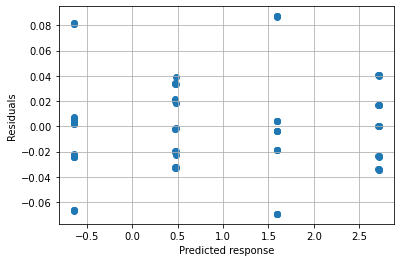

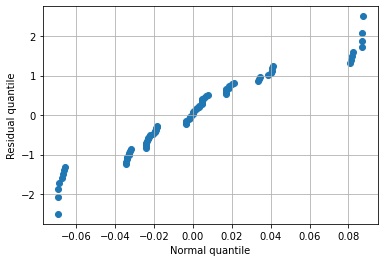

In [16]:
generate_input_file(sign_matrix, get_num_plane, params)
%run factorial2kr.py --confidence 0.9 --residuals residuals --qqnorm qqnorm 2kr_input
plots()

SSY 2.79e+03
SST 1.65e+02
SSE 0.437 0.27%
std dev 0.00924
q0 5.72 SS0 2.62e+03  (5.71, 5.74) 
qA -0.916 SSA 67.2 40.79% (-0.932, -0.901) 
qB 0.725 SSB 42.1 25.55% (0.71, 0.741) 
qAB -0.126 SSAB 1.27 0.77% (-0.141, -0.11) 
qC 0.0179 SSC 0.0256 0.02% (0.00247, 0.0333) 
qAC 0.00206 SSAC 0.000339 0.00% (-0.0134, 0.0175) ***
qBC -0.0116 SSBC 0.0107 0.01% (-0.027, 0.00383) ***
qABC -0.00119 SSABC 0.000114 0.00% (-0.0166, 0.0142) ***
qD 0.78 SSD 48.7 29.56% (0.765, 0.796) 
qAD -0.123 SSAD 1.22 0.74% (-0.139, -0.108) 
qBD -0.211 SSBD 3.56 2.16% (-0.226, -0.195) 
qABD -0.045 SSABD 0.162 0.10% (-0.0604, -0.0296) 
qCD 0.0253 SSCD 0.0514 0.03% (0.00993, 0.0408) 
qACD -0.012 SSACD 0.0114 0.01% (-0.0274, 0.00346) ***
qBCD -0.0115 SSBCD 0.0105 0.01% (-0.0269, 0.00396) ***
qABCD 0.00593 SSABCD 0.00281 0.00% (-0.00949, 0.0213) ***


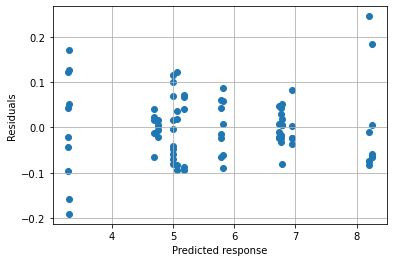

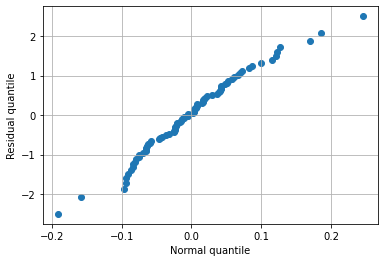

In [17]:
generate_input_file(sign_matrix, get_landing_queue, params)
%run factorial2kr.py --confidence 0.9 --residuals residuals --qqnorm qqnorm 2kr_input
plots()

SSY 2.29e+03
SST 96.9
SSE 0.597 0.62%
std dev 0.0108
q0 5.24 SS0 2.19e+03  (5.22, 5.26) 
qA -0.646 SSA 33.3 34.42% (-0.664, -0.628) 
qB 0.584 SSB 27.2 28.12% (0.566, 0.602) 
qAB -0.000996 SSAB 7.93e-05 0.00% (-0.019, 0.017) ***
qC 0.0581 SSC 0.27 0.28% (0.0401, 0.0761) 
qAC 0.00216 SSAC 0.000373 0.00% (-0.0159, 0.0202) ***
qBC -0.00708 SSBC 0.00401 0.00% (-0.0251, 0.0109) ***
qABC 0.0083 SSABC 0.00551 0.01% (-0.00973, 0.0263) ***
qD 0.617 SSD 30.4 31.40% (0.599, 0.635) 
qAD -0.0317 SSAD 0.0806 0.08% (-0.0498, -0.0137) 
qBD -0.243 SSBD 4.71 4.86% (-0.261, -0.225) 
qABD -0.0165 SSABD 0.0219 0.02% (-0.0346, 0.00149) ***
qCD 0.0386 SSCD 0.119 0.12% (0.0205, 0.0566) 
qACD 0.000205 SSACD 3.36e-06 0.00% (-0.0178, 0.0182) ***
qBCD -0.0266 SSBCD 0.0565 0.06% (-0.0446, -0.00855) 
qABCD -0.00543 SSABCD 0.00236 0.00% (-0.0235, 0.0126) ***


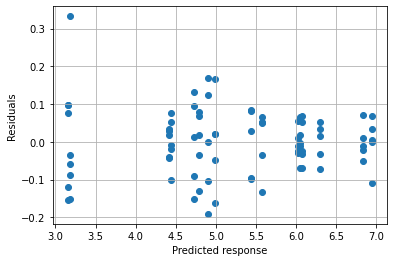

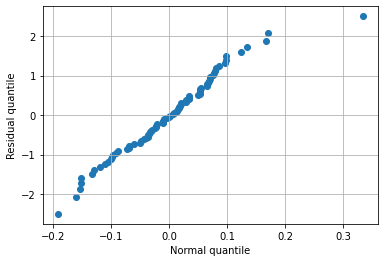

In [18]:
generate_input_file(sign_matrix, get_takeoff_queue, params)
%run factorial2kr.py --confidence 0.9 --residuals residuals --qqnorm qqnorm 2kr_input
plots()